<a href="https://colab.research.google.com/github/Davron030901/OpenCv/blob/main/10_Dilation%2C_Erosion_and_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dilation, Erosion and Edge Detection**

####**In this lesson we'll learn:**
1. Dilation
2. Erosion
3. Opening
4. Closing
5. Canny Edge Detection

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2024-11-13 13:16:58--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 3.5.246.182, 3.5.246.158, 52.95.149.46, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|3.5.246.182|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-13 13:16:58 ERROR 404: Not Found.

unzip:  cannot find or open images.zip, images.zip.zip or images.zip.ZIP.


- **Dilation** – Adds pixels to the boundaries of objects in an image
- **Erosion** – Removes pixels at the boundaries of objects in an image
- **Opening** - Erosion followed by dilation
- **Closing** - Dilation followed by erosion

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.19.08%20pm.png)

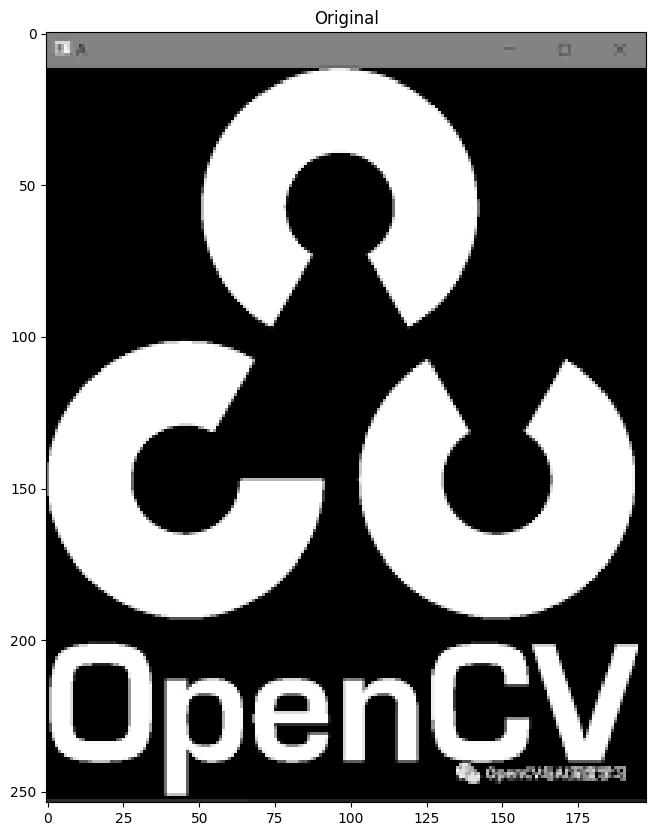

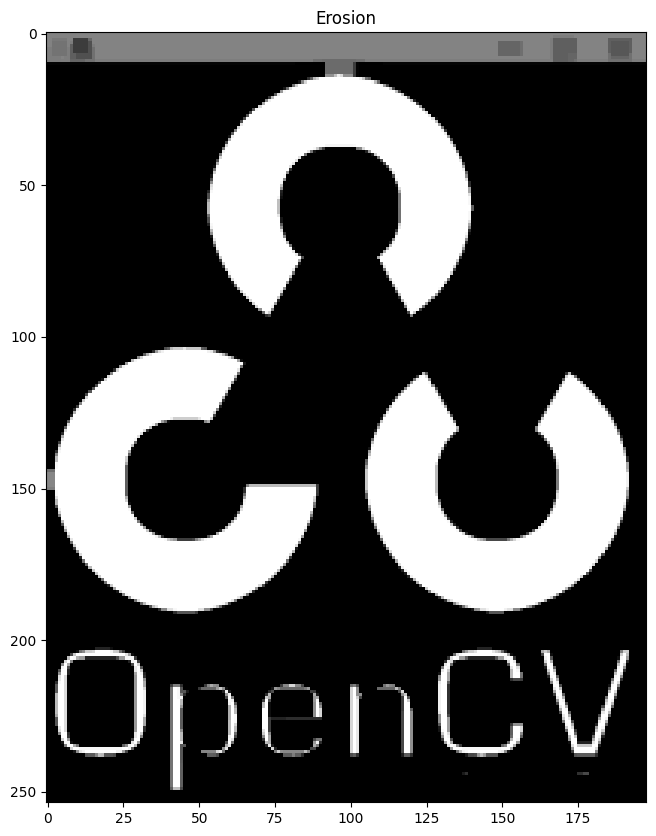

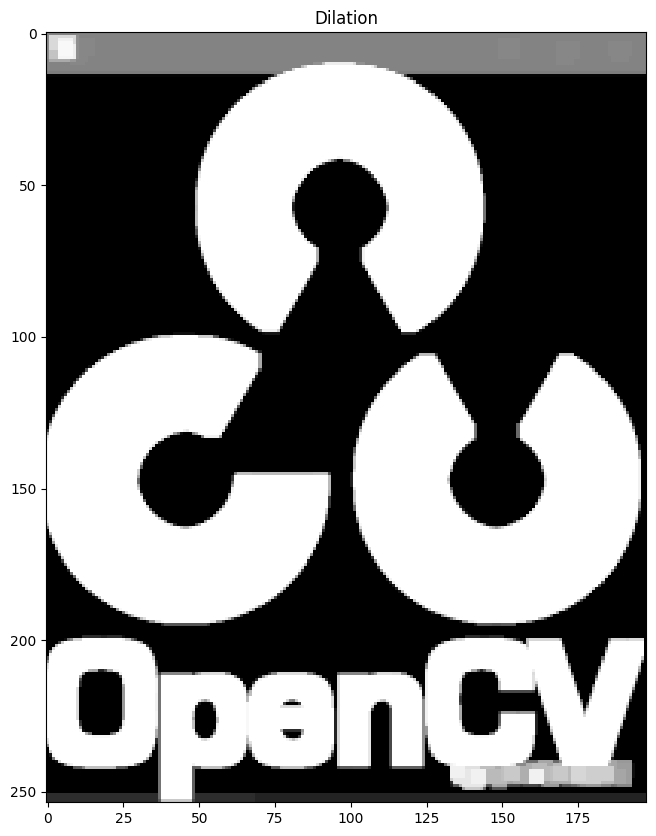

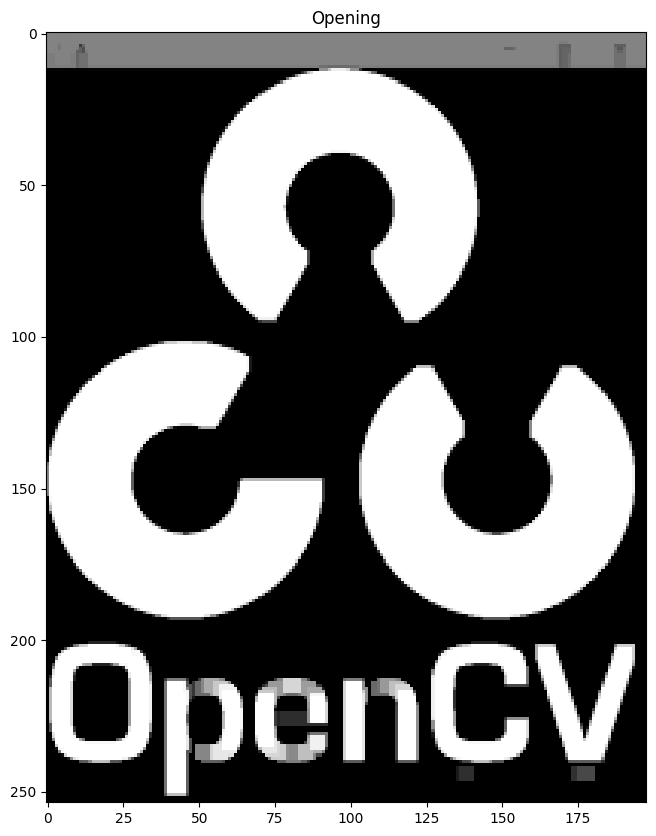

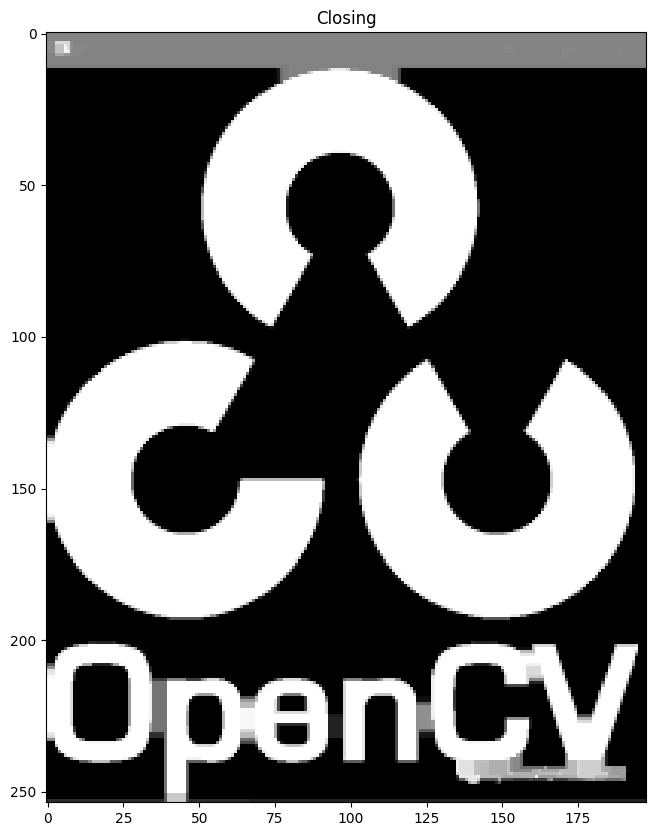

In [ ]:
import cv2
import numpy as np

image = cv2.imread('opencv_inv.png',0)
imshow('Original', image)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)
imshow('Erosion', erosion)

# Dilate here
dilation = cv2.dilate(image, kernel, iterations = 1)
imshow('Dilation', dilation)

# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
imshow('Opening',opening)

# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow('Closing',closing)

## **Canny Edge Detection**
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.24.15%20pm.png)

- The first argument is our input image.
- The second and third arguments are our minVal and maxVal respectively.
- The forth argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3.

Edge detection needs a threshold to tell what difference/change should be counted as edge

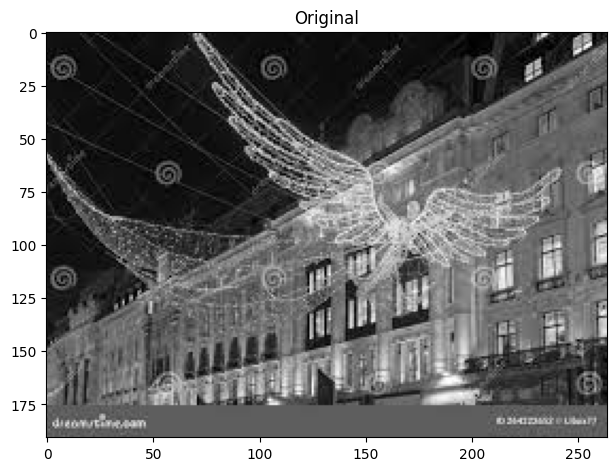

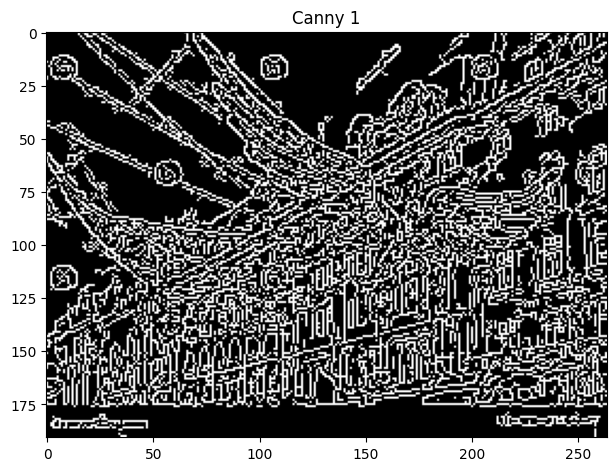

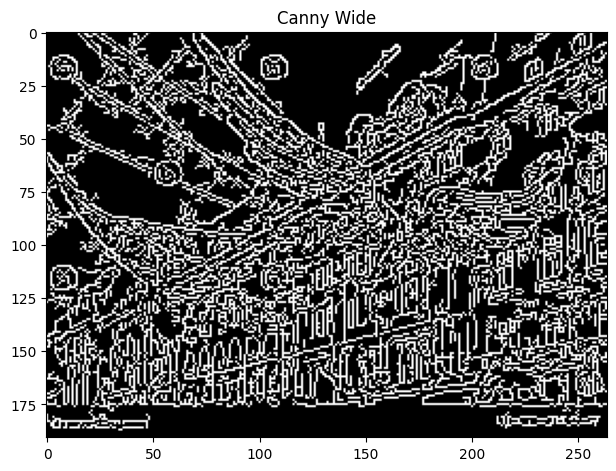

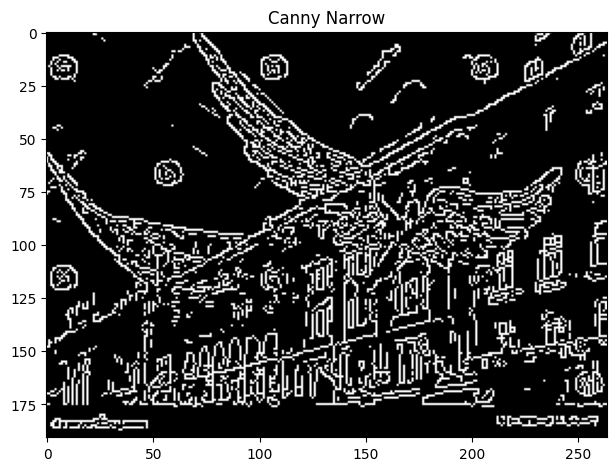

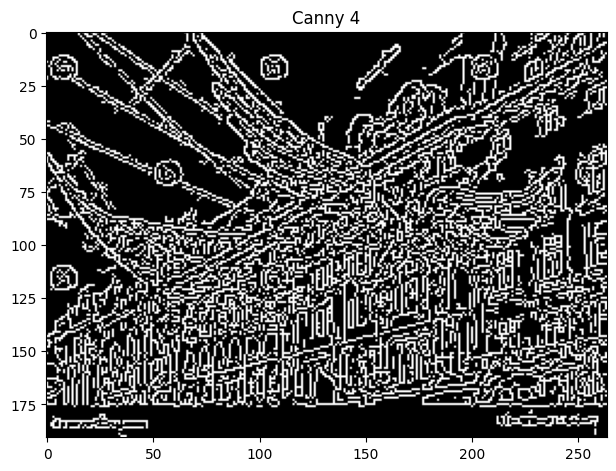

In [ ]:
image = cv2.imread('londonxmas.jpeg',0)
imshow('Original', image)
# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
imshow('Canny 1', canny)

# Wide edge thresholds expect lots of edges
canny = cv2.Canny(image, 10, 200)
imshow('Canny Wide', canny)

# Narrow threshold, expect less edges
canny = cv2.Canny(image, 200, 240)
imshow('Canny Narrow', canny)

canny = cv2.Canny(image, 60, 110)
imshow('Canny 4', canny)

##  Then, we need to provide two values: threshold1 and threshold2. Any gradient value larger than threshold2
# is considered to be an edge. Any value below threshold1 is considered not to be an edge.
#Values in between threshold1 and threshold2 are either classiﬁed as edges or non-edges based on how their
#intensities are “connected”. In this case, any gradient values below 60 are considered non-edges
#whereas any values above 120 are considered edges.

#### **Auto Canny**

In [ ]:
def autoCanny(image):
  # Finds optimal thresholds based on median image pixel intensity
  blurred_img = cv2.blur(image, ksize=(10,10))
  med_val = np.median(image)
  lower = int(max(0, 0.66 * med_val))
  upper = int(min(255, 1.33 * med_val))
  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

auto_canny = autoCanny(image)
imshow("auto canny", auto_canny)

NameError: name 'image' is not defined